In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Age : Age of the patient
Sex : Sex of the patient
exng: exercise induced angina (1 = yes; 0 = no)
caa: number of major vessels (0-3)
cp : Chest Pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [5]:
df=df.drop(['oldpeak','slp','thall'],axis=1) #removing features not important

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [7]:
df.shape

(303, 11)

In [8]:
df.isnull().sum() #remove the missing values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [9]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

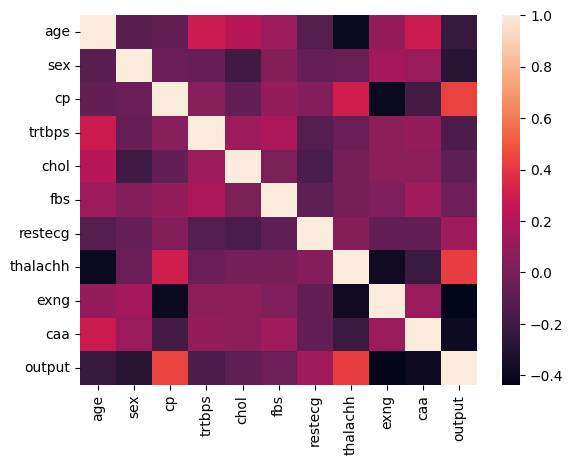

In [10]:
sns.heatmap(df.corr())

<Axes: title={'center': 'Age of the Patients'}, xlabel='age', ylabel='count'>

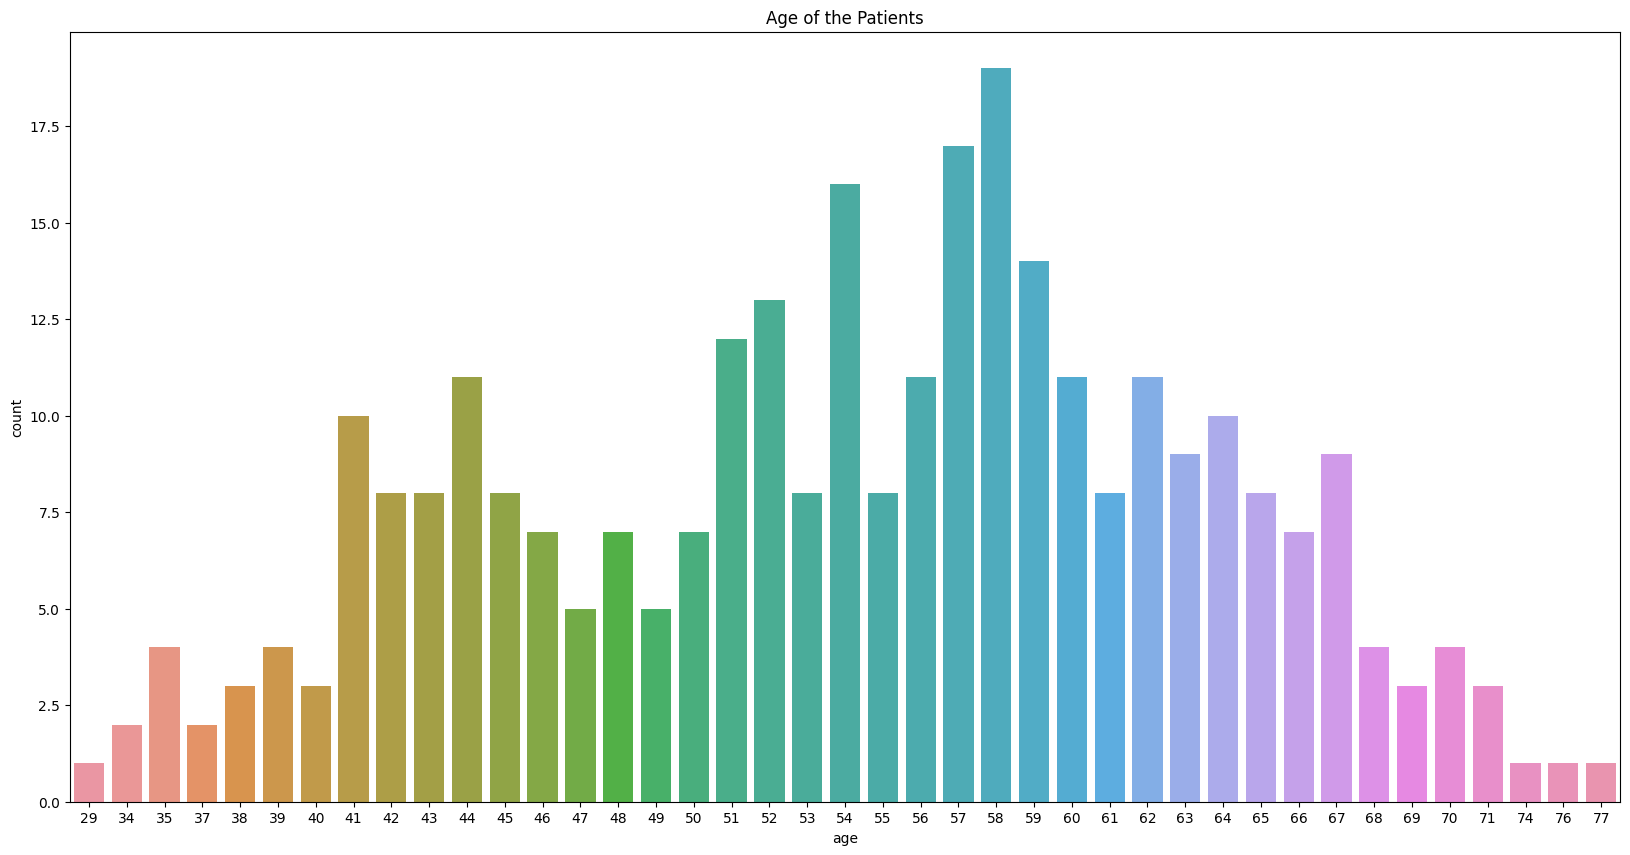

In [11]:
 #height of each bar represents the count of patients with that age value
plt.figure(figsize=(20,10))
plt.title("Age of the Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)
#By visualizing the distribution of ages, we can gain insights into the demographics of the patients
# in the dataset and how age may be related to other variables. For example, we might want to investigate whether there is a relationship between age
# and the likelihood of having a heart attack.

<Axes: title={'center': 'Sex of Patients,0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

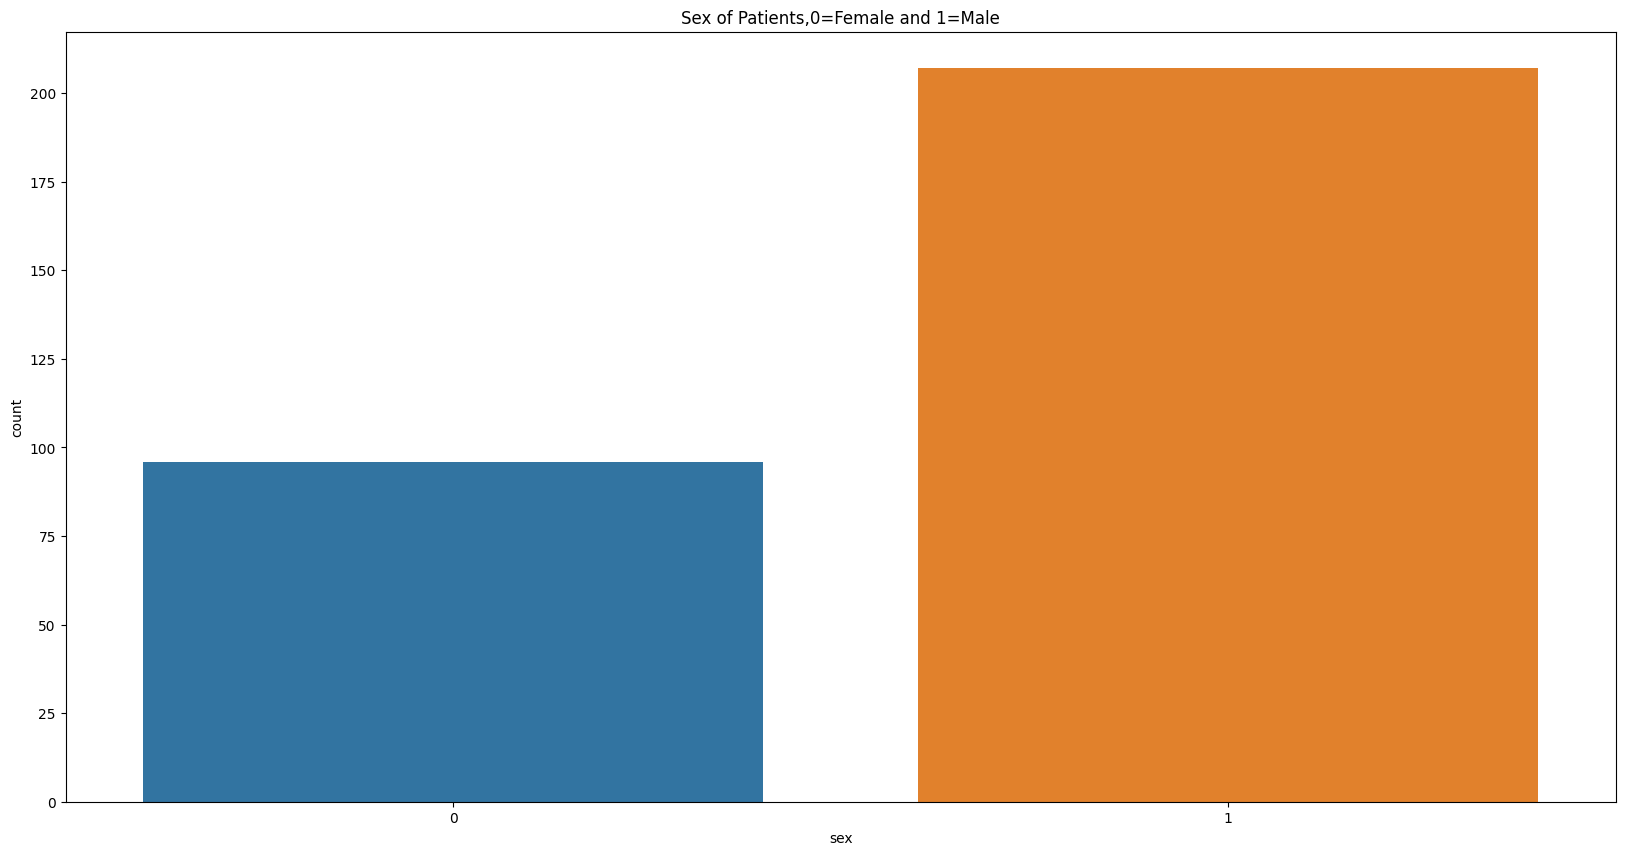

In [12]:
plt.figure(figsize=(20,10))
plt.title("Sex of Patients,0=Female and 1=Male")
sns.countplot(x='sex',data = df)


In [13]:


cp_data = df['cp'].value_counts().reset_index()
#rename the unique values in the 'index' column of the 'cp_data' dataframe to more descriptive names
cp_data['index'][0]='Typical Angina'
cp_data['index'][1] ='Atypical Angina'
cp_data['index'][2]='non-anginal'
cp_data['index'][3]='asymptomatic'
#By renaming the unique values in the 'cp_data' dataframe to these more descriptive names, we can make the data more understandable and meaningful for analysis.
#This can help us to identify any patterns or relationships between chest pain and other variables in the dataset.


cp_data

,index,cp
0,Typical Angina,143
1,Atypical Angina,87
2,non-anginal,50
3,asymptomatic,23


<Axes: title={'center': 'Chest Pain of Patients'}, xlabel='index', ylabel='cp'>

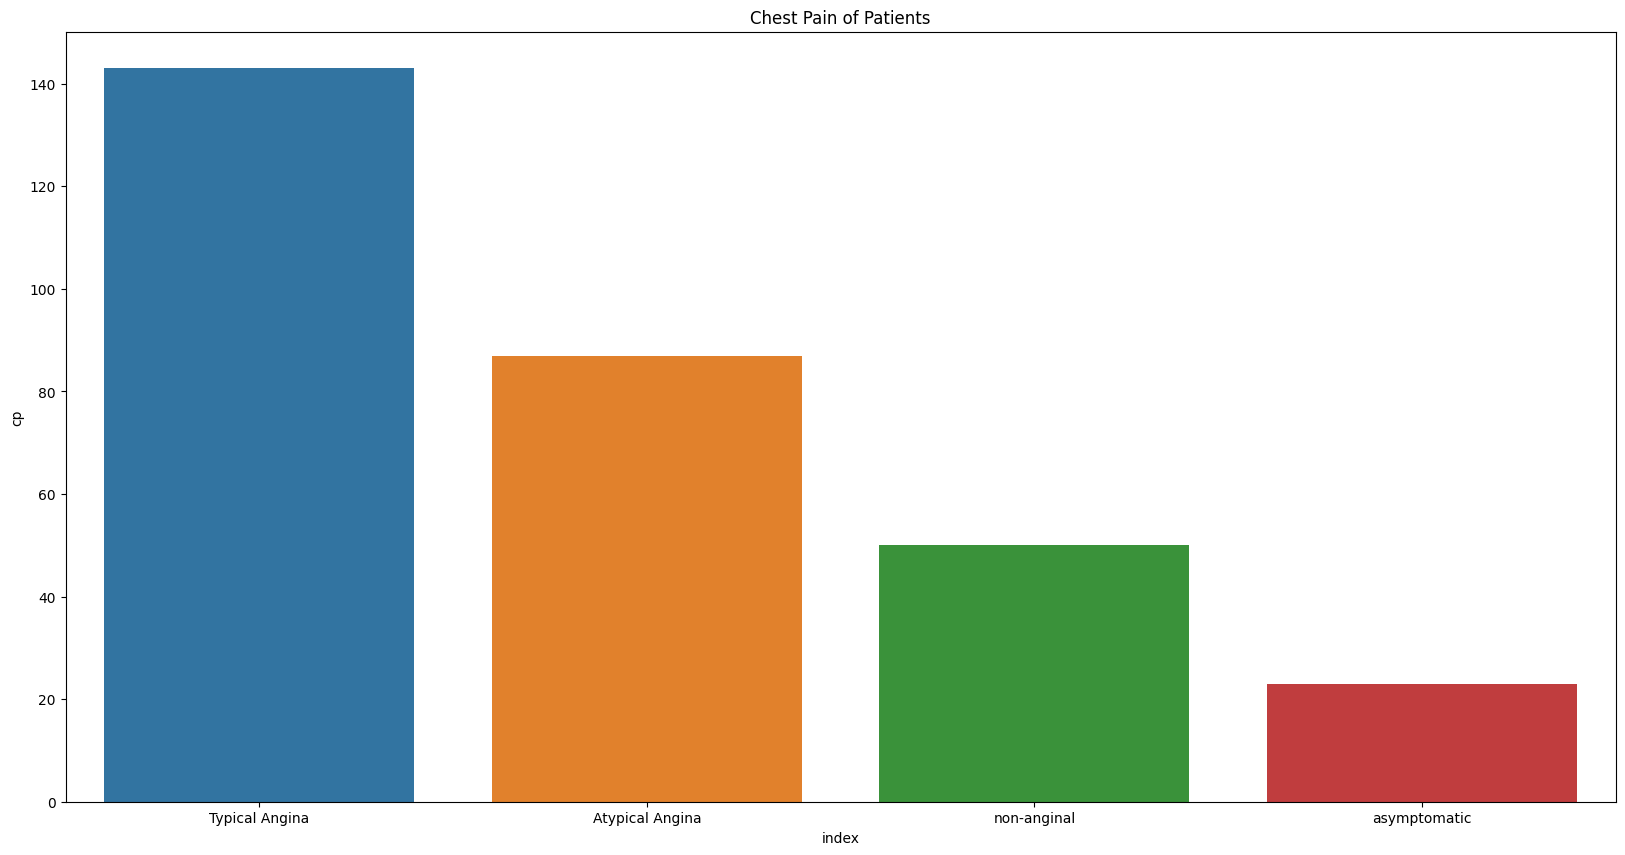

In [14]:
plt.figure(figsize=(20,10))
plt.title("Chest Pain of Patients")
sns.barplot(x=cp_data['index'],y=cp_data['cp'])

In [15]:
ecg_data = df['restecg'].value_counts().reset_index()
ecg_data['index'][0] ='normal'
ecg_data['index'][1] ='having ST-T wave abnormally'
ecg_data['index'][2] ='showing probable or definite left ventricular hypertrophy by Estes'
ecg_data

,index,restecg
0,normal,152
1,having ST-T wave abnormally,147
2,showing probable or definite left ventricular ...,4


<Axes: title={'center': 'ECG data of patients'}, xlabel='index', ylabel='restecg'>

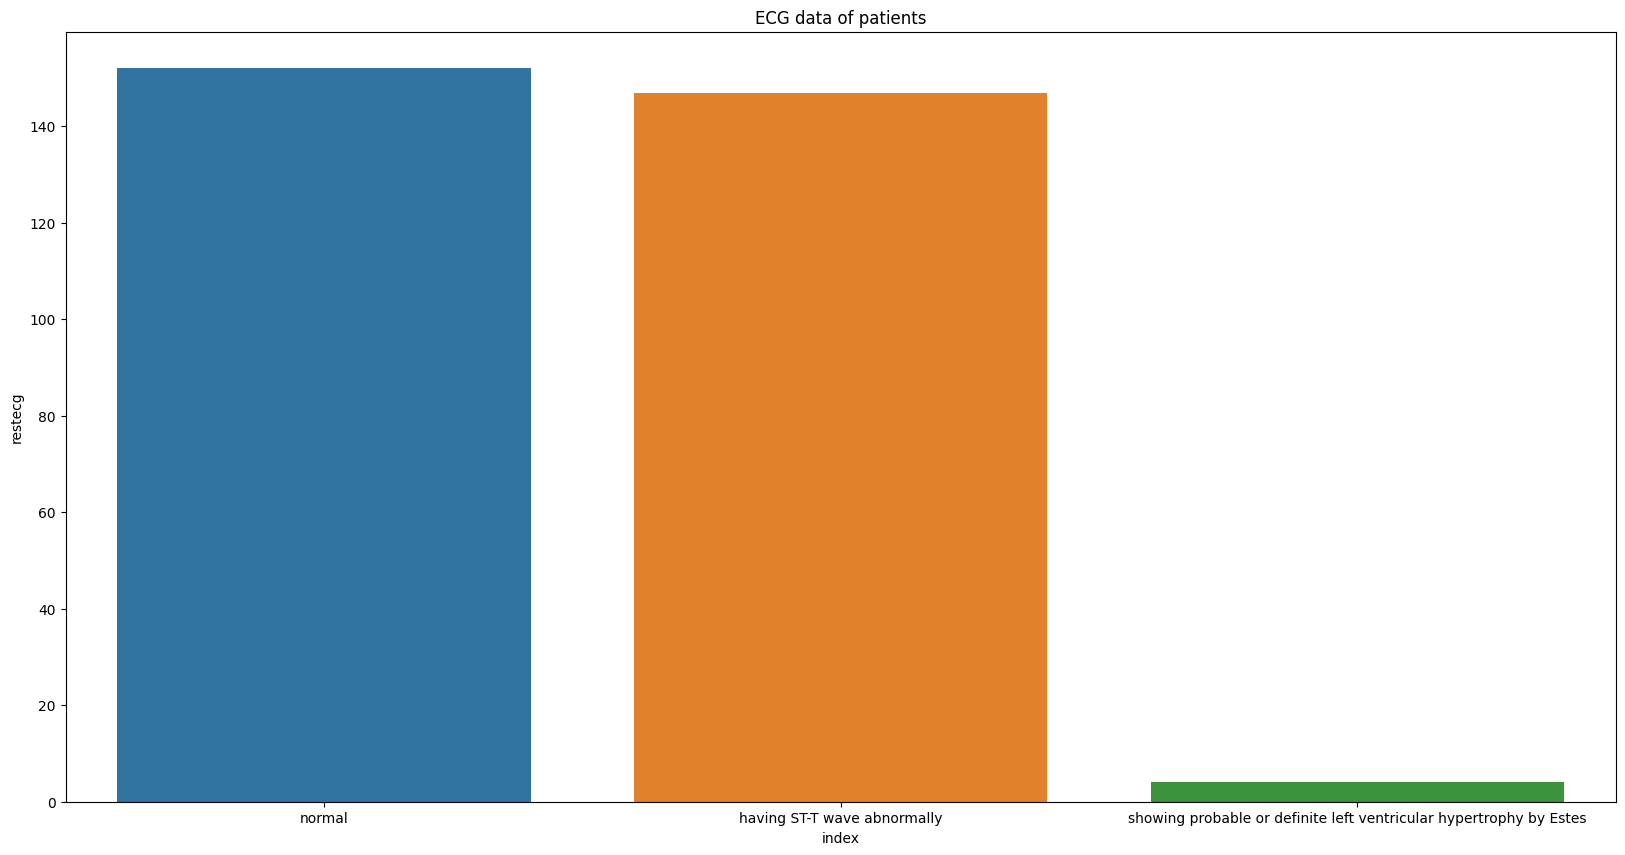

In [16]:
plt.figure(figsize=(20,10))
plt.title('ECG data of patients')
sns.barplot(x=ecg_data['index'],y=ecg_data['restecg'])

After this we can have a multivariate analysis which will tell us how these all the features are correlated in the form of different bar plots and distribution charts.This is same as the DF correlation but this is in the form of different charts

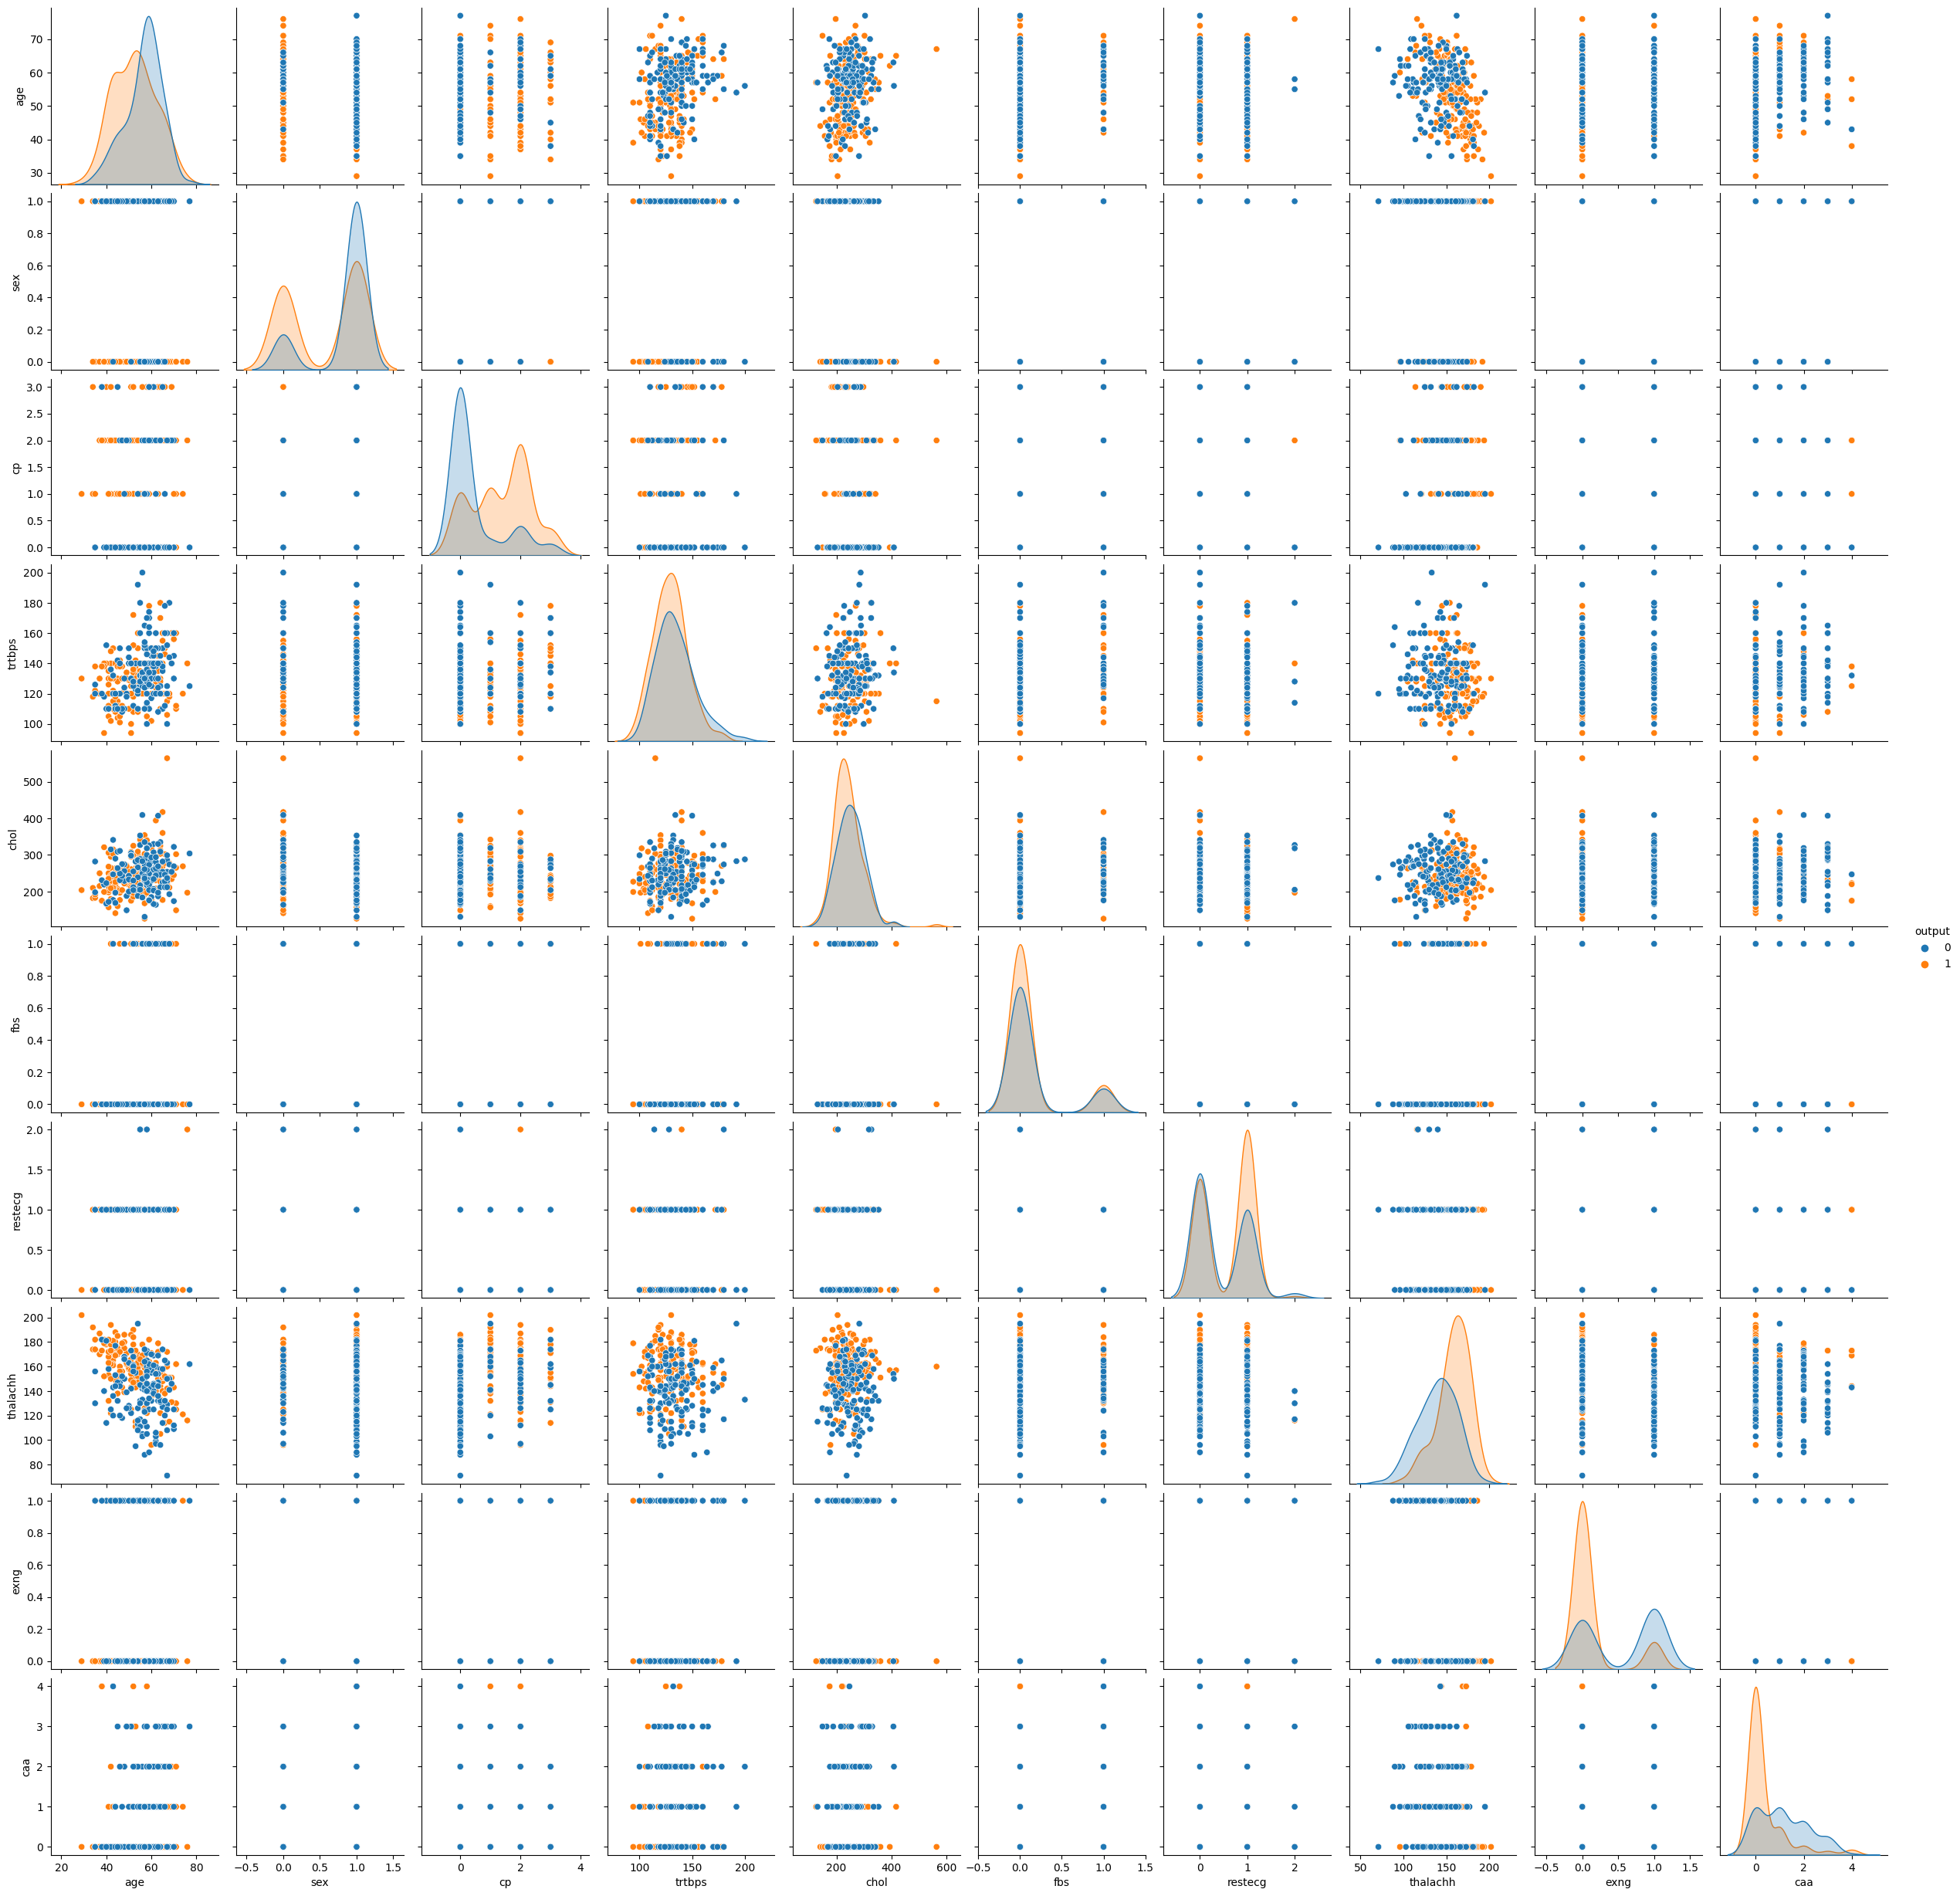

In [17]:
sns.pairplot(hue='output',data=df)

above graph 0 is for blue color and 1 for orange

>  continous varible are variable which are present in continous number



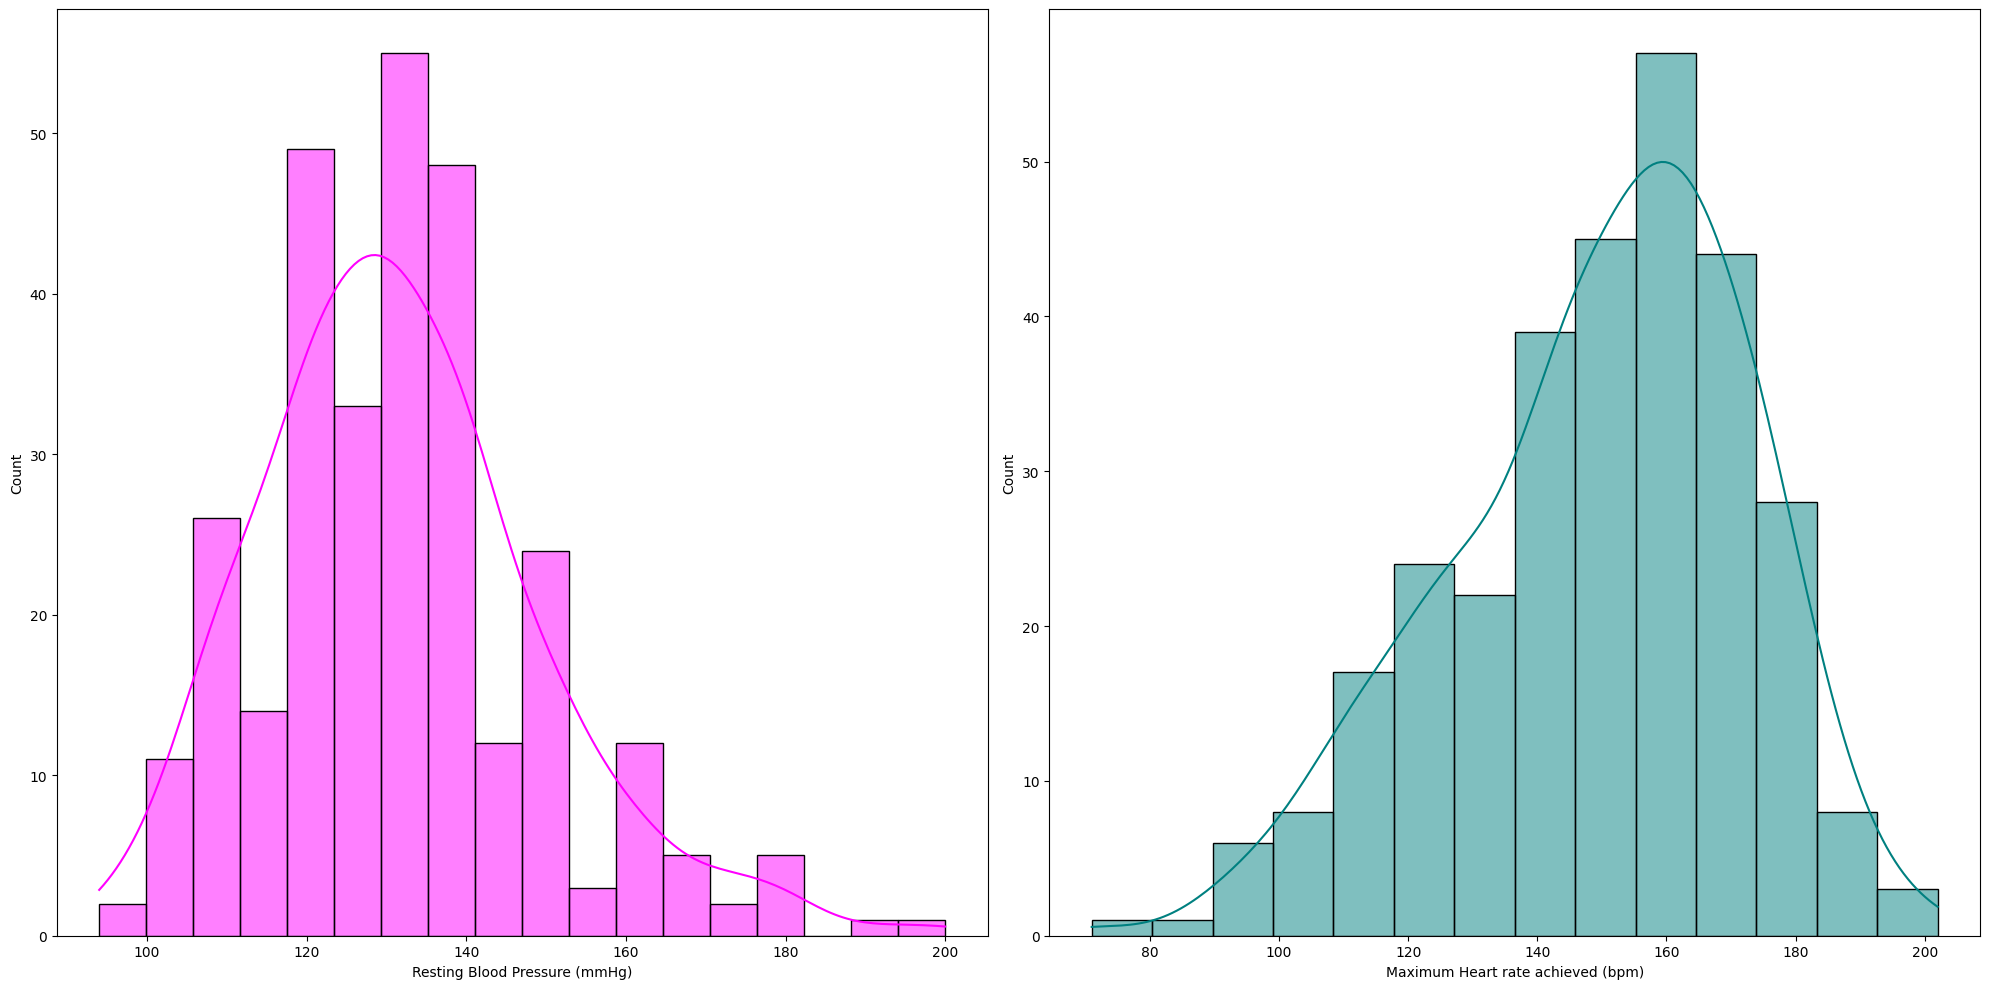

In [18]:


plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.histplot(df['trtbps'], kde=True, color='magenta')
plt.xlabel('Resting Blood Pressure (mmHg)')

plt.subplot(1, 2, 2)
sns.histplot(df['thalachh'], kde=True, color='teal')
plt.xlabel("Maximum Heart rate achieved (bpm)")

plt.tight_layout()
plt.show()








<ipython-input-19-2fa3d6ad5e10>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'],kde=True,color ='red')


Text(0.5, 0, 'cholestrol')

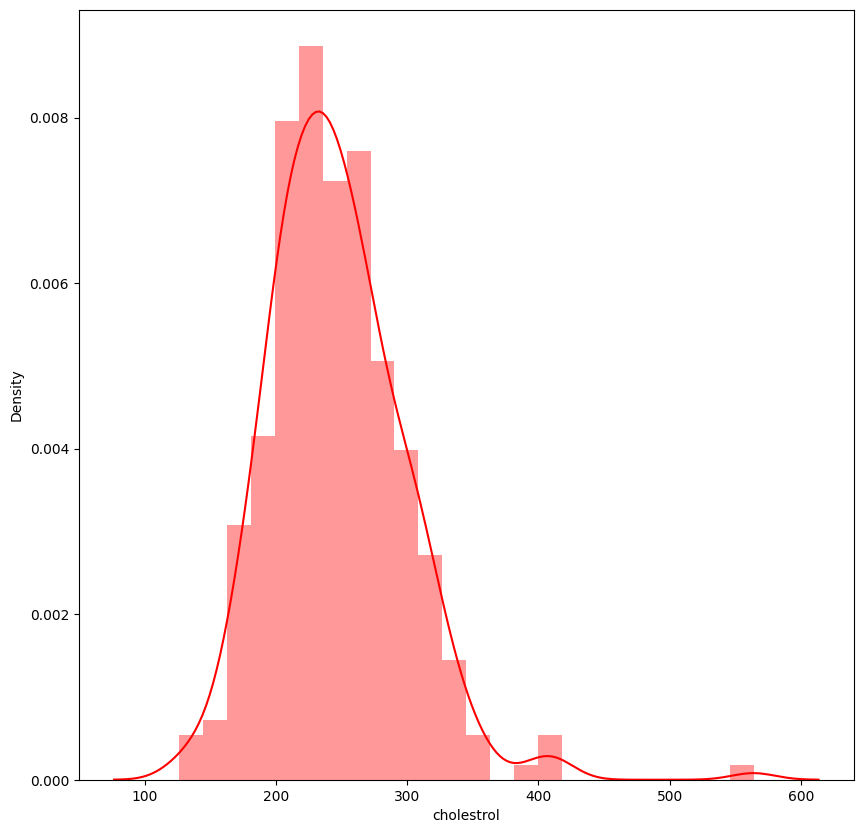

In [19]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'],kde=True,color ='red')
plt.xlabel("cholestrol")


In [20]:
df.chol.mean()
df.chol.describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [21]:
df.chol.std()

51.83075098793003

USING STANDARD DEVIATION TO REMOVE OUTLIER

In [22]:
#standard deviation 3
upper_limit = df.chol.mean() + 3*df.chol.std()

#anything more than 401.7 is marking as outlier
# same for lower limit
lower_limit = df.chol.mean() - 3*df.chol.std()


In [23]:
upper_limit

401.75627936643036

In [24]:
#if chol is higher that upper limit and lower than lower_limit show the points
df[(df.chol>upper_limit) | (df.chol<lower_limit)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
28,65,0,2,140,417,1,0,157,0,1,1
85,67,0,2,115,564,0,0,160,0,0,1
220,63,0,0,150,407,0,0,154,0,3,0
246,56,0,0,134,409,0,0,150,1,2,0


In [25]:
chol =df[(df.chol<upper_limit)& (df.chol>lower_limit)]
chol.shape

(299, 11)

In [26]:
df.shape[0] - chol.shape[0]

4

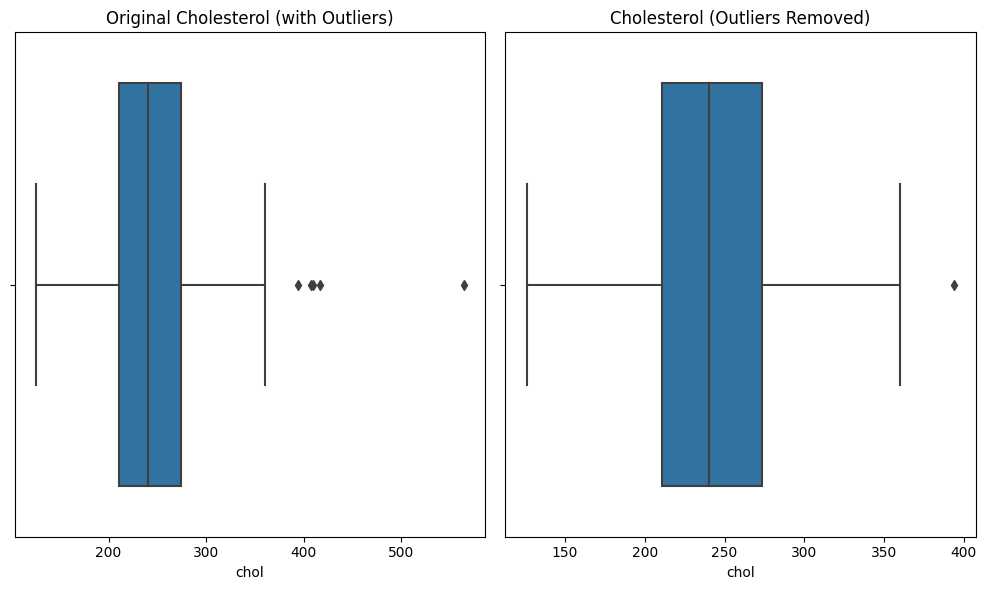

In [27]:


plt.figure(figsize=(10, 6))

# Original data with outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df['chol'])
plt.title('Original Cholesterol (with Outliers)')

# Data with outliers removed
plt.subplot(1, 2, 2)
sns.boxplot(x=chol['chol'])
plt.title('Cholesterol (Outliers Removed)')

plt.tight_layout()
plt.show()


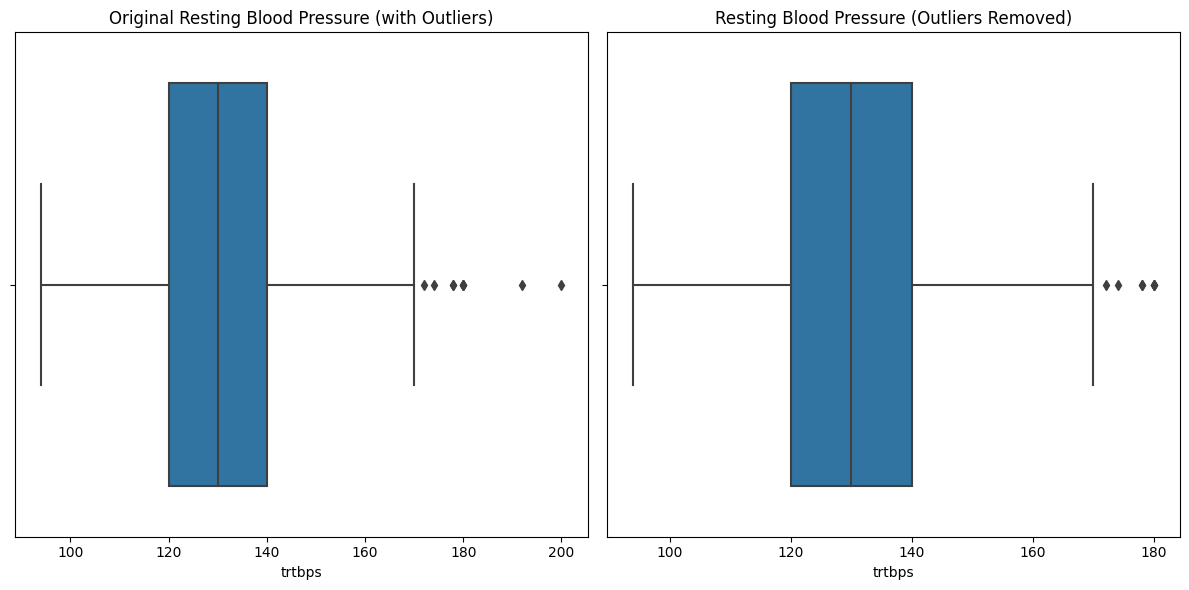

Number of removed outliers: 2


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Calculate upper and lower limits
upper_limit = df['trtbps'].mean() + 3 * df['trtbps'].std()
lower_limit = df['trtbps'].mean() - 3 * df['trtbps'].std()

# Filter data for outliers
trtbps = df[(df['trtbps'] < upper_limit) & (df['trtbps'] > lower_limit)]

plt.figure(figsize=(12, 6))

# Original data with outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df['trtbps'])
plt.title('Original Resting Blood Pressure (with Outliers)')

# Data with outliers removed
plt.subplot(1, 2, 2)
sns.boxplot(x=trtbps['trtbps'])
plt.title('Resting Blood Pressure (Outliers Removed)')

plt.tight_layout()
plt.show()

# Check how many outliers were removed
removed_outliers = df.shape[0] - trtbps.shape[0]
print(f"Number of removed outliers: {removed_outliers}")


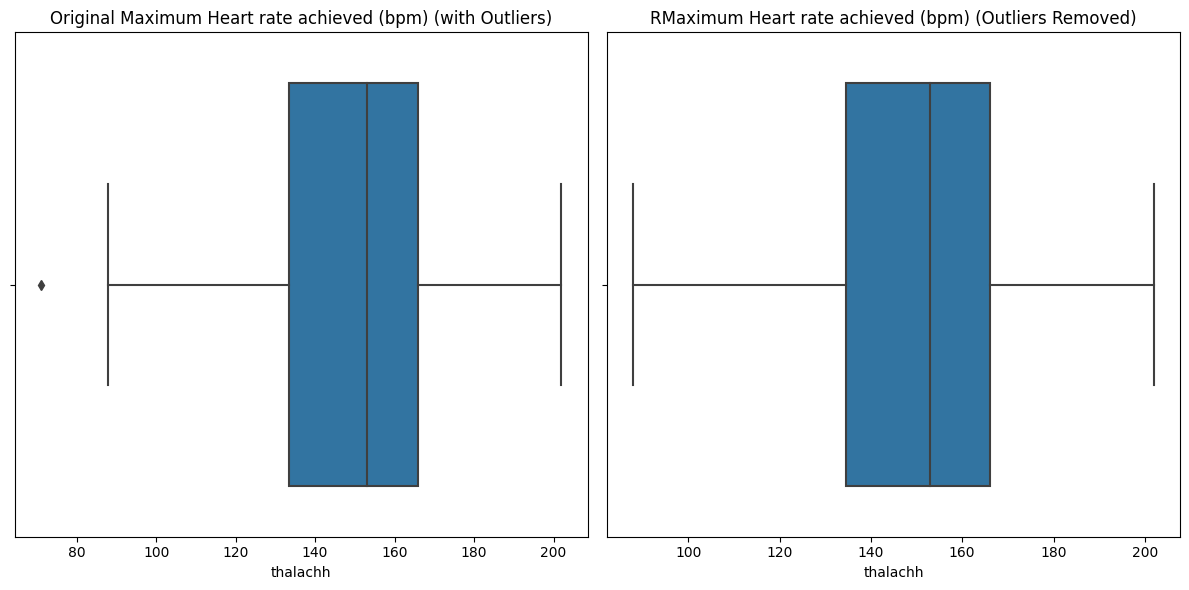

Number of removed outliers: 1


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Calculate upper and lower limits
upper_limit = df['thalachh'].mean() + 3 * df['thalachh'].std()
lower_limit = df['thalachh'].mean() - 3 * df['thalachh'].std()

# Filter data for outliers
thalachh = df[(df['thalachh'] < upper_limit) & (df['thalachh'] > lower_limit)]

plt.figure(figsize=(12, 6))

# Original data with outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df['thalachh'])
plt.title('Original Maximum Heart rate achieved (bpm) (with Outliers)')

# Data with outliers removed
plt.subplot(1, 2, 2)
sns.boxplot(x=thalachh['thalachh'])
plt.title('RMaximum Heart rate achieved (bpm) (Outliers Removed)')

plt.tight_layout()
plt.show()

# Check how many outliers were removed
removed_outliers = df.shape[0] - thalachh.shape[0]
print(f"Number of removed outliers: {removed_outliers}")

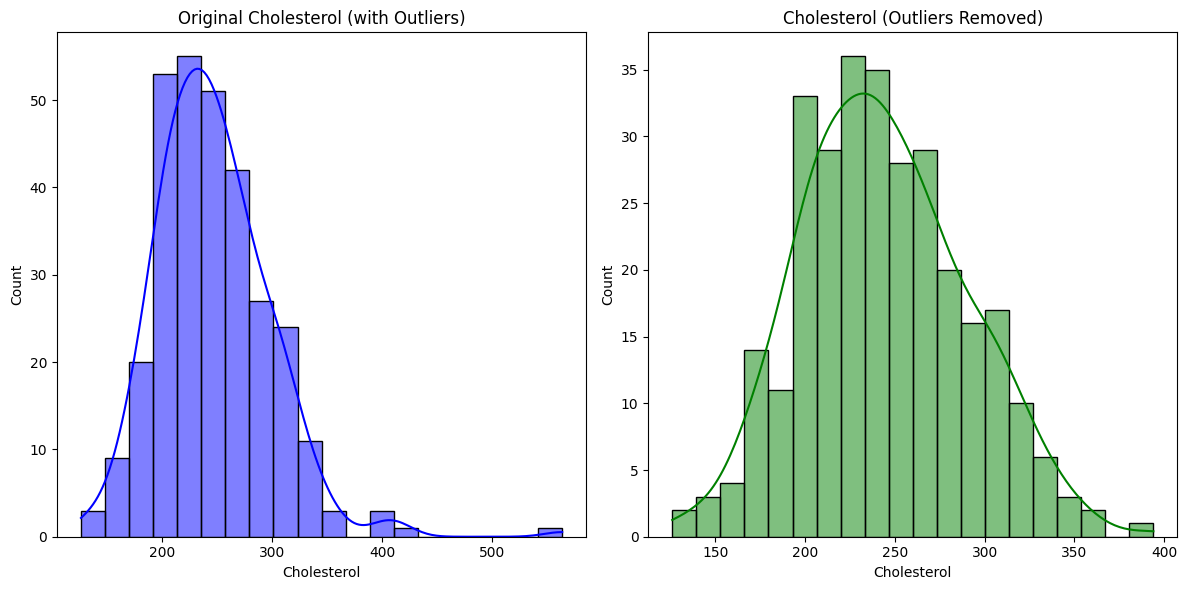

In [30]:


plt.figure(figsize=(12, 6))

# Original data with outliers
plt.subplot(1, 2, 1)
sns.histplot(df['chol'], bins=20, kde=True, color='blue')
plt.title('Original Cholesterol (with Outliers)')
plt.xlabel('Cholesterol')

# Data with outliers removed
plt.subplot(1, 2, 2)
sns.histplot(chol['chol'], bins=20, kde=True, color='green')
plt.title('Cholesterol (Outliers Removed)')
plt.xlabel('Cholesterol')

plt.tight_layout()
plt.show()


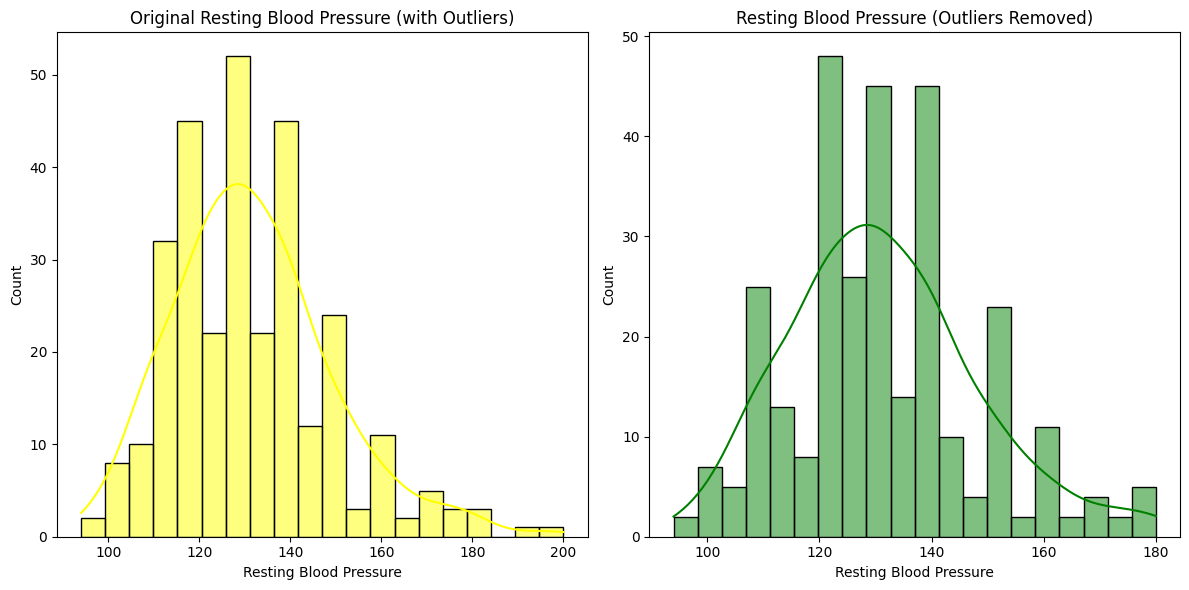

In [31]:
plt.figure(figsize=(12, 6))

# Original data with outliers
plt.subplot(1, 2, 1)
sns.histplot(df['trtbps'], bins=20, kde=True, color='yellow')
plt.title('Original Resting Blood Pressure (with Outliers)')
plt.xlabel('Resting Blood Pressure')

# Data with outliers removed
plt.subplot(1, 2, 2)
sns.histplot(trtbps['trtbps'], bins=20, kde=True, color='green')
plt.title('Resting Blood Pressure (Outliers Removed)')
plt.xlabel('Resting Blood Pressure')

plt.tight_layout()
plt.show()


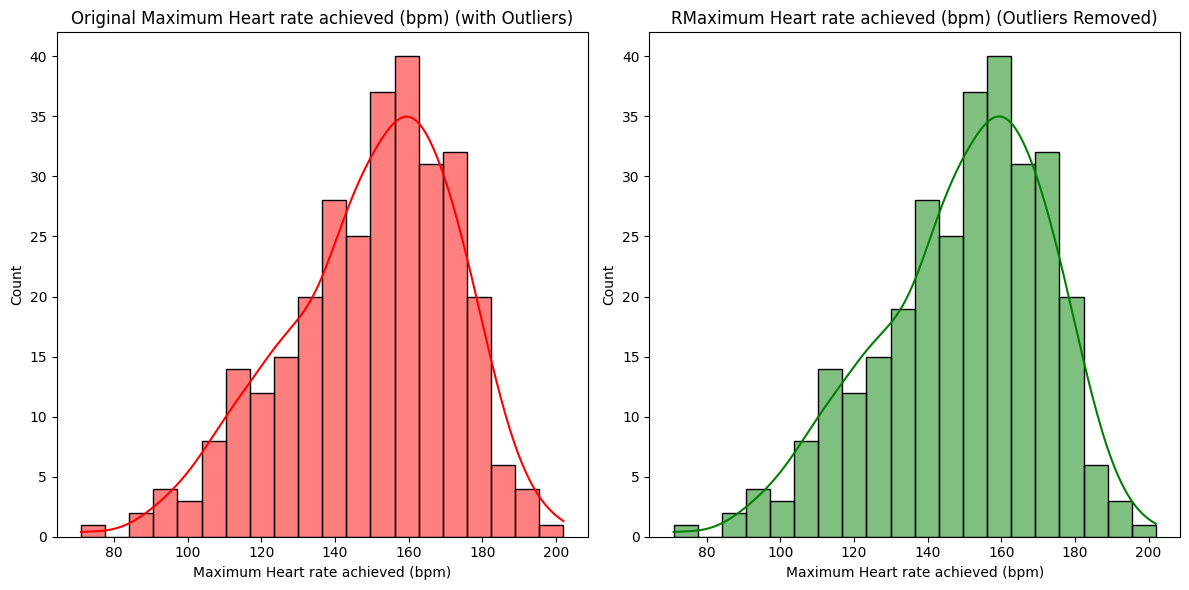

In [32]:
plt.figure(figsize=(12, 6))

# Original data with outliers
plt.subplot(1, 2, 1)
sns.histplot(df['thalachh'], bins=20, kde=True, color='red')
plt.title('Original Maximum Heart rate achieved (bpm) (with Outliers)')
plt.xlabel('Maximum Heart rate achieved (bpm)')

# Data with outliers removed
plt.subplot(1, 2, 2)
sns.histplot(trtbps['thalachh'], bins=20, kde=True, color='green')
plt.title('RMaximum Heart rate achieved (bpm) (Outliers Removed)')
plt.xlabel('Maximum Heart rate achieved (bpm)')

plt.tight_layout()
plt.show()

MODEL BUILDING

In [33]:
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [34]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scale = StandardScaler()
scale.fit(df)
df = scale.transform(df)
df = pd.DataFrame(df, columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exang', 'caa', 'output'])


In [35]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


split the data

In [36]:
x = df.iloc[:,:-1]
x
y = df.iloc[:,-1:]
y

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =10)

**Logistic** ***regression***

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
lbl = LabelEncoder()
encod_y = lbl.fit_transform(y_train)
LR = LogisticRegression()
LR.fit(x_train,encod_y)
y_pred1 = LR.predict(x_test)
encod_ytest = lbl.fit_transform(y_test)
LR_confmat = confusion_matrix(encod_ytest,y_pred1)
LR_acc = accuracy_score(encod_ytest,y_pred1)
print("LR confusion matrix",LR_confmat)
print("LR accuracy",LR_acc*100)

LR confusion matrix [[34 16]
 [ 5 36]]
LR accuracy 76.92307692307693


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*italicizedThe LabelEncoder is a preprocessing technique in machine learning used for transforming categorical labels (classes) into numerical labels. *

**DECISION TREE**

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree =DecisionTreeClassifier()
tree.fit(x_train,encod_y)
ypred2 = tree.predict(x_test)
tree_confmat =confusion_matrix(encod_ytest,ypred2)
tree_acc = accuracy_score(encod_ytest,ypred2)
print("tree confusion matrix",tree_confmat)
print("tree accuracy",tree_acc*100)

tree confusion matrix [[32 18]
 [ 6 35]]
tree accuracy 73.62637362637363


**RANDOM FOREST**

In [47]:
from sklearn.ensemble import RandomForestClassifier
RF =RandomForestClassifier()
RF.fit(x_train,encod_y)
ypred3 = RF.predict(x_test)
RF_confmat =confusion_matrix(encod_ytest,ypred3)
RF_acc = accuracy_score(encod_ytest,ypred3)
print("tree confusion matrix",RF_confmat)
print("tree accuracy",RF_acc*100)

tree confusion matrix [[32 18]
 [ 6 35]]
tree accuracy 73.62637362637363


**K NEAREST NEIGHBOUR**

In [51]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,encod_y)
  pred =knn.predict(x_test)
  error_rate.append(np.mean(pred != encod_ytest))
print(error_rate)

[0.26373626373626374, 0.26373626373626374, 0.27472527472527475, 0.27472527472527475, 0.24175824175824176, 0.25274725274725274, 0.24175824175824176, 0.26373626373626374, 0.26373626373626374, 0.27472527472527475, 0.25274725274725274, 0.24175824175824176, 0.26373626373626374, 0.23076923076923078, 0.25274725274725274, 0.25274725274725274, 0.25274725274725274, 0.25274725274725274, 0.25274725274725274, 0.25274725274725274, 0.27472527472527475, 0.27472527472527475, 0.27472527472527475, 0.25274725274725274, 0.26373626373626374, 0.26373626373626374, 0.26373626373626374, 0.26373626373626374, 0.27472527472527475, 0.26373626373626374, 0.2857142857142857, 0.2857142857142857, 0.2967032967032967, 0.27472527472527475, 0.2967032967032967, 0.27472527472527475, 0.2857142857142857, 0.2857142857142857, 0.27472527472527475]


<function matplotlib.pyplot.show(close=None, block=None)>

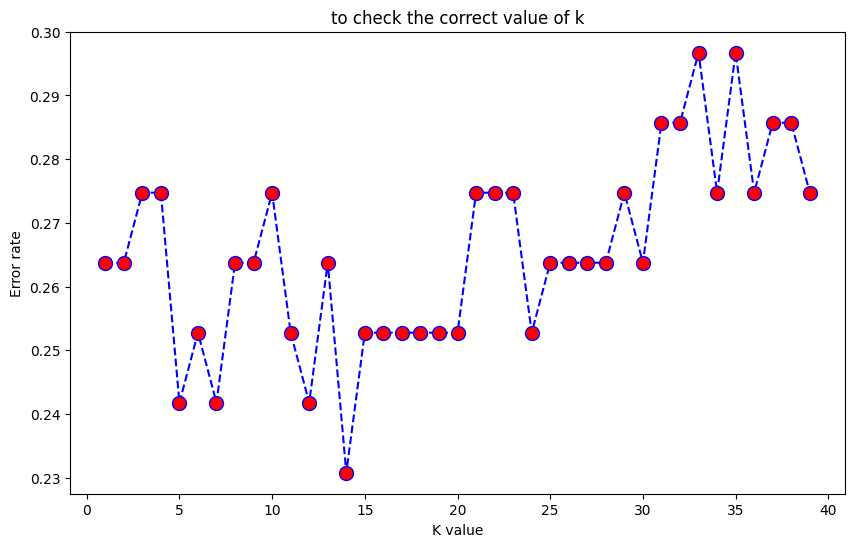

In [52]:
plt.figure(figsize =(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle ='dashed',marker='o',markerfacecolor='red',markersize =10)
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('to check the correct value of k')
plt.show

In [55]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,encod_y)
ypred4 =knn.predict(x_test)
knn_confmat =confusion_matrix(encod_ytest,ypred4)
knn_acc = accuracy_score(encod_ytest,ypred4)
print("knn confusion matrix",knn_confmat)
print("knn accuracy",knn_acc*100)

knn confusion matrix [[30 20]
 [ 3 38]]
knn accuracy 74.72527472527473


**SVM**

In [57]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,encod_y)
ypred5 = svm.predict(x_test)
svm_confmat =confusion_matrix(encod_ytest,ypred5)
svm_acc = accuracy_score(encod_ytest,ypred5)
print("svm confusion matrix",svm_confmat)
print("svm accuracy",svm_acc*100)

svm confusion matrix [[31 19]
 [ 4 37]]
svm accuracy 74.72527472527473


Comparing the accuracy of models

In [58]:
model_acc = pd.DataFrame({"Model":['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbour','SVM'],'Accuracy':[LR_acc*100,tree_acc*100,RF_acc*100,knn_acc*100,svm_acc*100]})

In [59]:
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [60]:
model_acc

,Model,Accuracy
0,Logistic Regression,76.923077
3,K Nearest Neighbour,74.725275
4,SVM,74.725275
1,Decision Tree,73.626374
2,Random Forest,73.626374


**ADABOOST technique which uses multiple models for better accuracy**

In [63]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(base_estimator=svm,n_estimators =100,algorithm='SAMME',learning_rate =0.01,random_state =0)
adab.fit(x_train,encod_y)
ypred6 = adab.predict(x_test)
adab_confmat =confusion_matrix(encod_ytest,ypred6)
adab_acc = accuracy_score(encod_ytest,ypred6)
print("adab confusion matrix",adab_confmat)
print("adab accuracy",adab_acc*100)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


adab confusion matrix [[ 0 50]
 [ 0 41]]
adab accuracy 45.05494505494506
